In [13]:
import pandas as pd

# Merge

No pandas, o merge é usado para combinar dois DataFrames, funcionando de maneira semelhante a um `JOIN` em **SQL**. Ele é feito com o método `merge()`, que permite unir os dados com base em uma ou mais colunas.

Sintaxe básica do método `merge()` :


`df_merge = pd.merge(DataFrame1, DataFrame2, on='coluna_chave', how='tipo_de_join')`

* **DataFrame1**, **DataFrame2** : DataFrames que serão únidos;
* **on** : Coluna chave utilizada na junção;
* **how**: Tipo de junção;

Tipos de Merge

| Tipo de `merge()` | Descrição                                                                                               |
|-------------------|---------------------------------------------------------------------------------------------------------|
| `inner` (padrão)  | Mantém apenas os registros correspondentes nas duas tabelas.                                            |
| `left`            | Mantém todos os registros do primeiro DataFrame e os correspondentes do segundo.                        |
| `right`           | Mantém todos os registros do segundo DataFrame e os correspondentes do primeiro.                        |
| `outer`           | Retorna todos os registros de ambos os DataFrames, preenchendo com NaN onde não houver correspondência. |
| `cross`           | Retorna o produto cartesiano de ambos os DataFrmes. |

Para exemplificar o método `merge()` e os tipos de **join** usaremos o seguinte DataFrame:

In [14]:
## Criando o DataFrame alunos contendo id_aluno de 1 até 20
df_alunos = pd.DataFrame({
    'id_aluno':list(range(1,21)),
    'nome':['Rafael','Mariana','Eduardo','Camila','Gustavo','Fernanda','Lucas','Bianca','Ricardo','Juliana','André','Vanessa','Felipe','Amanda','Leonardo','Tatiane','Bruno','Carolina','Daniel','Isabela']
})

df_alunos

,id_aluno,nome
0,1,Rafael
1,2,Mariana
2,3,Eduardo
3,4,Camila
4,5,Gustavo
5,6,Fernanda
6,7,Lucas
7,8,Bianca
8,9,Ricardo
9,10,Juliana


In [15]:
## Criando DataFrame auxiliar contendo as notas de alguns alunos
df_notas = pd.DataFrame({
    'id_aluno' :[1,3,5,7,8,10,12,13,14,16,18,20,25,31,34,37],
    'nota_media':[4.3,5,6.7,8.9,10,9.3,4,5.5,8.7,5.7,9.2,9.7,10,0.6,7.5,7]
})

df_notas

,id_aluno,nota_media
0,1,4.3
1,3,5.0
2,5,6.7
3,7,8.9
4,8,10.0
5,10,9.3
6,12,4.0
7,13,5.5
8,14,8.7
9,16,5.7


## Inner Join

O **INNER JOIN** retorna apenas as linhas que têm correspondência entre os DataFrames. Se uma chave estiver presente em apenas um dos DataFrames, a linha correspondente será descartada.

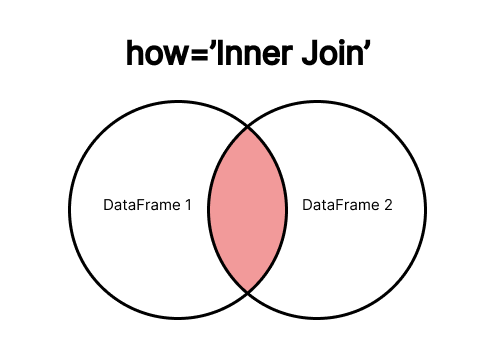

Utilizaremos os DataFrames criados `df_alunos` e `df_notas`.

In [16]:
df_inner_merged = pd.merge(df_alunos, df_notas, on='id_aluno')

df_inner_merged

,id_aluno,nome,nota_media
0,1,Rafael,4.3
1,3,Eduardo,5.0
2,5,Gustavo,6.7
3,7,Lucas,8.9
4,8,Bianca,10.0
5,10,Juliana,9.3
6,12,Vanessa,4.0
7,13,Felipe,5.5
8,14,Amanda,8.7
9,16,Tatiane,5.7


Como o **inner join** já é a junção padrão do Pandas, não é necessário especificar no atributo `how=`

Perceba que:
* O **inner join** mantém apenas as correspondências entre os DataFrames;
* As linhas sem correspondência são excluídas;
* Podemos unir com uma ou mais colunas-chave (Podemos passar no atributo `on=` uma lista de colunas chaves);

Portanto, nosso DataFrame com o `merge(merge(df_alunos, df_notas, on='id_aluno')` feito possui no final apenas **12 linhas**. Pois, o limitante da junção é o DataFrame com menor índice `df_notas`.

Quando usar o **inner join**:
* Quando queremos apenas os dados que possuem correspondência entre os dois DataFrames;
* Para limpar dados, removendo registros sem correspondência;

## Left Join

O **LEFT JOIN** retorna todas as linhas do primeiro DataFrame (DataFrame 1 na imagem), mantendo apenas as correspondências do segundo DataFrame (DataFrame 2 na imagem). Se não houver correspondência, os valores do segundo DataFrame (DataFrame 2) serão preenchidos com `NaN`.

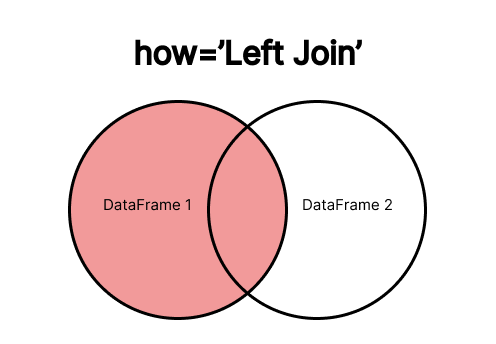

Utilizaremos os DataFrames criados `df_alunos` e `df_notas`.

In [17]:
df_left_merged = pd.merge(df_alunos, df_notas, on='id_aluno', how='left')

df_left_merged

,id_aluno,nome,nota_media
0,1,Rafael,4.3
1,2,Mariana,NaN
2,3,Eduardo,5.0
3,4,Camila,NaN
4,5,Gustavo,6.7
5,6,Fernanda,NaN
6,7,Lucas,8.9
7,8,Bianca,10.0
8,9,Ricardo,NaN
9,10,Juliana,9.3


Perceba que:
* O **left join** mantém as linhas do primeiro DataFrame (`df_alunos`) intacta;
* As linhas sem correspondência no segundo DataFrame (`df_notas`) são preenchidos com `NaN`;
* Podemos unir com uma ou mais colunas-chave (Podemos passar no atributo `on=` uma lista de colunas chaves);

Portanto, nosso DataFrame com o `merge(df_alunos, df_notas, on='id_aluno', how='left')` feito possui no final todas as **20 linhas** do DataFrame `df_alunos`. Pois, o limitante da junção é sempre o primeiro DataFrame.

Quando usar o **left join**:
* Quando queremos manter todos os registros do primeiro DataFrame, mesmo sem correspondência no segundo;
* Quando estamos trabalhando com tabelas principais e secundárias, onde o DataFrame 1 contém todos os registros e o DataFrame 2 tem apenas informações adicionais;
* Quando queremos evitar perda de dados ao unir tabelas;

## Right Join

O **RIGHT JOIN** retorna todas as linhas do segundo DataFrame (DataFrame 2 na imagem), mantendo apenas as correspondências do primeiro DataFrame (DataFrame 1 na imagem). Se não houver correspondência, os valores do primeiro DataFrame serão preenchidos com `NaN`.

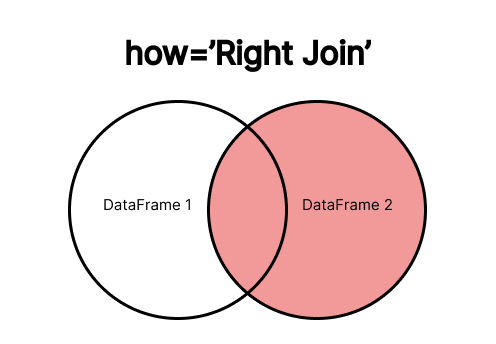

Utilizaremos os DataFrames criados `df_alunos` e `df_notas`.

In [18]:
df_right_merged = pd.merge(df_alunos, df_notas, on='id_aluno', how='right')

df_right_merged

,id_aluno,nome,nota_media
0,1,Rafael,4.3
1,3,Eduardo,5.0
2,5,Gustavo,6.7
3,7,Lucas,8.9
4,8,Bianca,10.0
5,10,Juliana,9.3
6,12,Vanessa,4.0
7,13,Felipe,5.5
8,14,Amanda,8.7
9,16,Tatiane,5.7


Perceba que:
* O **right join** mantém as linhas do segundo DataFrame (`df_notas`) intacta;
* As linhas sem correspondência no primeiro DataFrame (`df_alunos`) são preenchidos com `NaN`;
* Podemos unir com uma ou mais colunas-chave (Podemos passar no atributo `on=` uma lista de colunas chaves);

Portanto, nosso DataFrame com o `merge(df_alunos, df_notas, on='id_aluno', how='right')` feito possui no final todas as **16 linhas** do DataFrame `df_notas`. Pois, o limitante da junção é sempre o segundo DataFrame.

Quando usar o **right join**:
* Quando queremos manter todos os registros do segundo DataFrame, mesmo sem correspondência no primeiro;
* Quando estamos trabalhando com tabelas principais e secundárias, onde o DataFrame 2 contém todos os registros e o DataFrame 1 tem apenas informações adicionais;
* Quando queremos evitar perda de dados do segundo DataFrame ao unir tabelas;

## Outer Join

O **OUTER JOIN** retorna todas as linhas de ambos os DataFrames, mantendo as correspondências sempre que possível. Se um valor não tiver correspondência no outro DataFrame, ele será preenchido com `NaN`.

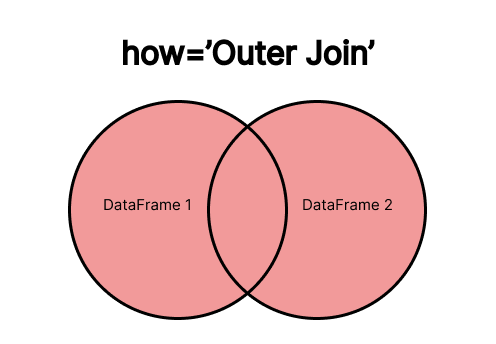

In [19]:
df_outer_merged = pd.merge(df_alunos, df_notas, on='id_aluno', how='outer')

df_outer_merged

,id_aluno,nome,nota_media
0,1,Rafael,4.3
1,2,Mariana,NaN
2,3,Eduardo,5.0
3,4,Camila,NaN
4,5,Gustavo,6.7
5,6,Fernanda,NaN
6,7,Lucas,8.9
7,8,Bianca,10.0
8,9,Ricardo,NaN
9,10,Juliana,9.3


Perceba que:
* O **outer join** mantém todas as linhas de ambos os DataFrames;
* Se não houver correspondência em um dos DataFrames, os valores são preenchidos com `NaN`;
* Podemos unir com uma ou mais colunas-chave (Podemos passar no atributo `on=` uma lista de colunas chaves);

Portanto, nosso DataFrame com o `merge(df_alunos, df_notas, on='id_aluno', how='outer')` feito possui no final todas as **20 linhas** do DataFrame `df_notas` e todas as **16 linhas** do DataFrame `df_notas` com suas respectivas combinações e o valor `NaN` quando não existe correspondência.

Quando usar o **outer join**:
* Quando queremos manter todos os registros de ambos os DataFrames, independentemente de haver correspondência;
* Quando estamos trabalhando com dados de fontes diferentes, e queremos unir tudo sem perder informações;
* Quando precisamos identificar quais registros não têm correspondência entre os dois DataFrames;

## Cross Join

O **CROSS JOIN** retorna o produto cartesiano dos dois DataFrames, ou seja, cada linha do DataFrame 1 é combinada com todas as linhas do DataFrame 2, independentemente de haver uma chave em comum.

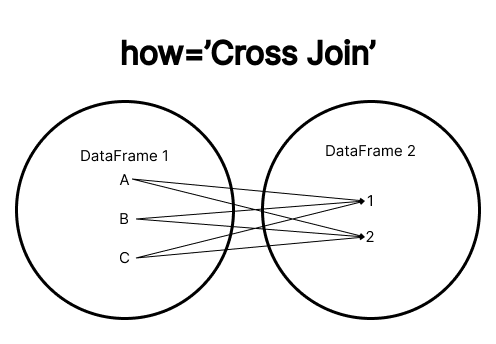

Utilizaremos o seguinte DataFrame para exemplificar o **cros join** :

In [20]:
## Criando DataFrame 1
Dataframe_1 = pd.DataFrame({
    'nome' :['Lucas','Andressa','Gabriel'],
    'idade':[30,28,29]
})

Dataframe_1

,nome,idade
0,Lucas,30
1,Andressa,28
2,Gabriel,29


In [23]:
## Criando DataFrame 2
Dataframe_2 = pd.DataFrame({
    'materias' :['Matemática','Geografia'],
    'nota_aprovacao':[7.5,6.0]
})

Dataframe_2

,materias,nota_aprovacao
0,Matemática,7.5
1,Geografia,6.0


In [24]:
df_cross_merged = pd.merge(Dataframe_1, Dataframe_2, how='cross')

df_cross_merged

,nome,idade,materias,nota_aprovacao
0,Lucas,30,Matemática,7.5
1,Lucas,30,Geografia,6.0
2,Andressa,28,Matemática,7.5
3,Andressa,28,Geografia,6.0
4,Gabriel,29,Matemática,7.5
5,Gabriel,29,Geografia,6.0


Perceba que:
* O **cross join** cada linha do DataFrame 1 foi combinada com todas as linhas de DataFrame 2;
* O resultado tem **N * M** linhas, onde **N** é o número de linhas em `DataFrame_1` e **M** é o número de linhas em `DataFrame_2`;
* Não contém o parâmetro `on=`

Portanto, nosso DataFrame com o `merge(Dataframe_1, Dataframe_2, how='cross')` feito possui no final todas as **6 linhas** já que o resultado do **cross join** sempre é o número de linhas do DataFrame 1 (**3 linhas**) * número de linhas do DataFrame 2 (**2 linhas**), o que é igual a **6* linhas*.

Quando usar o **cross join**:
* Quando precisamos combinar todas as possibilidades entre dois conjuntos de dados;
* Em casos de simulações e modelagens, onde cada variável precisa ser combinada com todas as outras;
* Para criar combinações exaustivas entre duas tabelas que não possuem uma chave comum;

# Concat

No **SQL**, a operação `UNION` combina os resultados de duas tabelas. No Pandas, usamos a função `concat()` para empilhar DataFrames de forma **VERTICAL** (Adicionando mais linhas) ou de forma **HORIZONTAL** (Adicionando mais colunas).

Sintaxe básica do método `concat()` :

`df_concat = pd.concat(lista_df, axis=0, join='tipo_de_join', ignore_index=False, keys=None)`

* **lista_df** : Lista de DataFrames a serem concatenados;
* **axis=0 (Padrão)** : Concatena verticalmente (adiciona linhas, igual ao `UNION ALL` do **SQL**);
* **axis=1** : Concatena horizontalmente (adiciona colunas, similar a um `JOIN`);
* **join='outer' (Padrão)** : Mantém todas as colunas, preenchendo `NaN` quando necessário;
* **join='inner'** : Mantém somente as colunas comuns entre os DataFrames;
* **ignore_index=True** : Índices vão ser reajustados automaticamente;
* **keys=['R1','R2']** : Adiciona rótulos de identificação para cada DataFrame concatenado;

Para exemplificar o método `concat()` usaremos os seguintes DataFrames:

In [27]:
## Criando DataFrame 1 contendo cadastro de pessoas feito via site
df_cadastro_site = pd.DataFrame({
    'ID': [1, 2, 3, 4, 5], 
    'Nome': ['Ana', 'Bruno', 'Lucas', 'Andressa', 'Marcelo'],
    'Idade': [25, 35, 30, 28, 20]})

df_cadastro_site

,ID,Nome,Idade
0,1,Ana,25
1,2,Bruno,35
2,3,Lucas,30
3,4,Andressa,28
4,5,Marcelo,20


In [30]:
## Criando DataFrame 2 contendo cadastro de pessoas feito via visita
df_cadastro_visita = pd.DataFrame({
    'ID': [6, 7, 8, 9, 10], 
    'Nome': ['Frederico', 'Junior', 'Pedro', 'Gabriela', 'Lucia'],
    'Idade': [25, 40, 70, 33, 45],
    'Sexo': ['M','M','M','F','F']})

df_cadastro_visita

,ID,Nome,Idade,Sexo
0,6,Frederico,25,M
1,7,Junior,40,M
2,8,Pedro,70,M
3,9,Gabriela,33,F
4,10,Lucia,45,F


In [44]:
## Criando DataFrame 2 contendo cadastro de pessoas feito via visita
df_salario = pd.DataFrame({
    'Profissão': ['Professor', 'Motorista', 'Segurança', 'Entregador'], 
    'Salario': [5000,6500,3200,4400]
    })

df_salario

,Profissão,Salario
0,Professor,5000
1,Motorista,6500
2,Segurança,3200
3,Entregador,4400


## Concatenação Vertical

A concatenação vertical é a operação de 'empilhar' DataFrames, adicionando novas linhas. No Pandas, isso é feito com `concat()` usando `axis=0` (padrão).

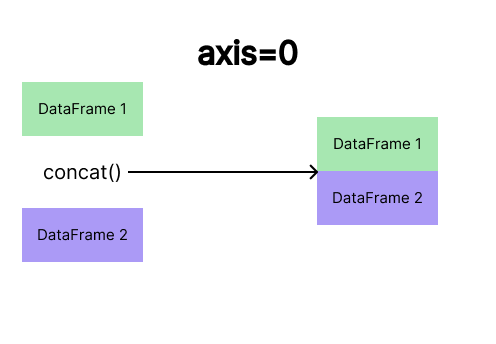

In [46]:
## Concatenando o DataFrame 1 (df_cadastro_site) com o DataFrame 2 (df_cadastro_visita)
df_vertical_concat = pd.concat([df_cadastro_site, df_cadastro_visita], ignore_index=True)

df_vertical_concat

,ID,Nome,Idade,Sexo
0,1,Ana,25,NaN
1,2,Bruno,35,NaN
2,3,Lucas,30,NaN
3,4,Andressa,28,NaN
4,5,Marcelo,20,NaN
5,6,Frederico,25,M
6,7,Junior,40,M
7,8,Pedro,70,M
8,9,Gabriela,33,F
9,10,Lucia,45,F


Repare que a coluna que existia de diferente entre a lista de DataFrames (**'Sexo'**) foi preenchida como `NaN` e o novo DataFrame `df_vertical_concat` contém agora **10 linhas** e **4 colunas**.

Podemos utilizar a junção `join='inner'` para obtermos apenas o empilhamento de linhas com colunas identicas entre a lista de DataFrames:

In [40]:
## Concatenando apenas as colunas iguais do DataFrame 1 (df_cadastro_site) com o DataFrame 2 (df_cadastro_visita)
df_vertical_inner_concat = pd.concat([df_cadastro_site, df_cadastro_visita], join='inner', ignore_index=True)

df_vertical_inner_concat

,ID,Nome,Idade
0,1,Ana,25
1,2,Bruno,35
2,3,Lucas,30
3,4,Andressa,28
4,5,Marcelo,20
5,6,Frederico,25
6,7,Junior,40
7,8,Pedro,70
8,9,Gabriela,33
9,10,Lucia,45


Agora a coluna **'Sexo'** não existe mais e o empilhamento de linhas aconteceu somente nas colunas que eram identicas na lista de FataFrames. O novo DataFrame `df_vertical_inner_concat` contém agora **10 linhas** e **3 colunas**.

Quando usar a **concatenação com `axis=0`?**:
* Quando temos dados adicionais da mesma estrutura e queremos empilha-los;
* Para combinar datasets de diferentes períodos (ex: dados de vendas mensais e/ou anuais);
* Para empilhar registros de diferentes fontes sem alterar as colunas;

## Concatenação Horizontal

A concatenação horizontal é a operação de juntar DataFrames lado a lado, adicionando novas colunas em vez de novas linhas. No Pandas, fazemos isso com `concat()` usando `axis=1`.

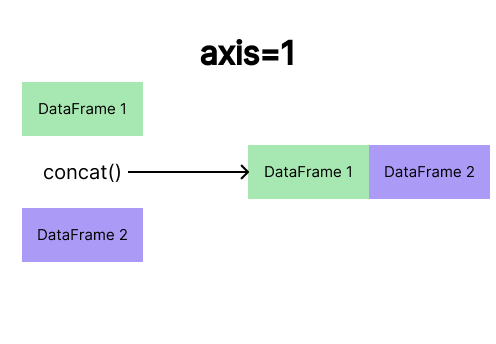

In [49]:
## Concatenando o DataFrame 1 (df_cadastro_site) com o DataFrame 3 (df_salario)
df_horizontal_concat = pd.concat([df_cadastro_site, df_salario],axis=1)

df_horizontal_concat

,ID,Nome,Idade,Profissão,Salario
0,1,Ana,25,Professor,5000.0
1,2,Bruno,35,Motorista,6500.0
2,3,Lucas,30,Segurança,3200.0
3,4,Andressa,28,Entregador,4400.0
4,5,Marcelo,20,NaN,NaN


Repare que os DataFrames foram unidos lado a lado, formando um novo conjunto de colunas no novo DataFrame `df_horizontal_concat` e que os índices diferentes foram preenchidos com `NaN`.

Podemos também utilizar a junção `join='inner'` na concatenação com `axis=1`:

In [50]:
## Concatenando apenas índices iguais do DataFrame 1 (df_cadastro_site) com o DataFrame 3 (df_salario)
df_horizontal_inner_concat = pd.concat([df_cadastro_site, df_salario],axis=1,join='inner')

df_horizontal_inner_concat

,ID,Nome,Idade,Profissão,Salario
0,1,Ana,25,Professor,5000
1,2,Bruno,35,Motorista,6500
2,3,Lucas,30,Segurança,3200
3,4,Andressa,28,Entregador,4400


Agora apenas os índices iguais foram mantidos no novo DataFrame `df_horizontal_inner_concat`.

Quando usar a **concatenação com `axis=1`?**:
* Quando temos dados complementares sobre as mesmas observações;
* Quando queremos juntar informações de diferentes fontes;
* Quando precisamos combinar colunas extras em um DataFrame;